# Exploration of population wide phenomena in data set

## Questions:
1. How is migraine localization distributed?
    - Is this different in depressives and non depressives?
2. Can migraine logging be associated with increased severity of depression?

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from plot_functions.load_palette import load_palette
import data_processing.import_data as imp
import importlib

In [3]:
longitudinal_data = imp.import_all_longitudinal_files()
palette = load_palette()
longitudinal_data.head()

IMPORTING LONGITUDINAL DATA FROM:
	 /Users/akre96/Data/DGC_Study/Longitudinal Data with New Barometric Data


,subject_id,Date,Calories (kcal),Distance (mi),Average heart rate (bpm),Max heart rate (bpm),Min heart rate (bpm),Step count,swtype,device_id_call,...,mbrep_sxs_6,mbrep_sxs_other_6,mbrep_auras_6,mbrep_auras_other_6,mbrep_pain_pos_left_6,mbrep_pain_pos_right_6,mbrep_meds_6,mbrep_relief_6,mbrep_notes_6,migraine_buddy_reports_v2_complete_6
0,m2_0049,2018-10-24,NaN,NaN,NaN,NaN,NaN,NaN,Android,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,m2_0049,2018-10-25,NaN,NaN,NaN,NaN,NaN,NaN,Android,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,m2_0049,2018-10-26,NaN,NaN,NaN,NaN,NaN,NaN,Android,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,m2_0049,2018-10-27,NaN,NaN,NaN,NaN,NaN,NaN,Android,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,m2_0049,2018-10-28,NaN,NaN,NaN,NaN,NaN,NaN,Android,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
importlib.reload(imp)
demog_data = imp.import_demographic_file()
demog_data.head()

,subject_id,final_subject_status,final_data_status,scid_date,scid_dx_1,scid_dx_2,scid_dx_3,scid_dx_4,scid_dx_5,scid_dx_6,...,catmh_mdd_diagnosis_fp,catmh_dep_severity_fp,catmh_dep_category_fp,catmh_anx_severity_fp,catmh_anx_category_fp,catmh_mania_severity_fp,catmh_mania_category_fp,catmh_ss_diagnosis_fp,catmh_ss_severity_fp,catmh_ss_category_fp
1,m2_0001,Complete,Complete / Include,2017-06-20 12:30:00,Past Major Depressive Episode #1,300.4 Current Persistent Depressive Disorder ...,300.4 Past Persistent Depressive Disorder #1 ...,"296.22 Major Depressive Disorder, Single Epis...",300.3 Obsessive-Compulsive Disorder,NaN,...,Positive,68.4,Moderate,66.0,Severe,3.2,Normal,Negative,NaN,NaN
2,m2_0002,Complete,Complete / Include,2017-08-22 14:05:00,NaN,NaN,NaN,NaN,NaN,NaN,...,Negative,35.7,Normal,24.4,Normal,0.0,Normal,Negative,NaN,NaN
3,m2_0003,Complete,Complete / Include,2017-08-29 11:12:00,"Past Major Depressive Episode, With Peripartum...",NaN,NaN,NaN,NaN,NaN,...,Positive,43.6,Normal,25.1,Normal,0.0,Normal,Negative,NaN,NaN
4,m2_0005,Complete,Complete / Include,2017-09-08 11:00:00,Past Major Depressive Episode #1,"296.35 Major Depressive Disorder, Recurrent, ...",300.23 Social Anxiety Disorder Current In Pa...,300.29 Specific Phobia,NaN,NaN,...,Positive,65.6,Moderate,31.3,Normal,15.7,Normal,Negative,NaN,NaN
5,m2_0006,Complete,Complete / Include,2017-09-22 14:30:00,"296.26 Major Depressive Disorder, Single Epis...",NaN,NaN,NaN,NaN,NaN,...,Negative,25.3,Normal,28.8,Normal,46.5,Normal,Negative,NaN,NaN


In [21]:
overlap = [c for c in demog_data.columns if c in longitudinal_data.columns]
overlap

['subject_id',
 'catmh_datecompleted_1',
 'catmh_mdd_diagnosis_1',
 'catmh_dep_severity_1',
 'catmh_dep_category_1',
 'catmh_anx_severity_1',
 'catmh_anx_category_1',
 'catmh_mania_severity_1',
 'catmh_mania_category_1',
 'catmh_ss_diagnosis_1',
 'catmh_ss_severity_1',
 'catmh_ss_category_1',
 'catmh_datecompleted_2',
 'catmh_mdd_diagnosis_2',
 'catmh_dep_severity_2',
 'catmh_dep_category_2',
 'catmh_anx_severity_2',
 'catmh_anx_category_2',
 'catmh_mania_severity_2',
 'catmh_mania_category_2',
 'catmh_ss_diagnosis_2',
 'catmh_ss_severity_2',
 'catmh_ss_category_2']

## Q1: How is migraine localization distributed? Is this different in depressives and non depressives?

In [24]:
demog_cols = [c for c in demog_data.columns if 'catmh' not in c] 
with_demog = longitudinal_data.merge(
    demog_data[demog_cols]
)
print(with_demog.shape, longitudinal_data.shape)

(3112, 295) (4579, 229)


In [30]:
reind = with_demog.set_index(['subject_id', 'Date'])
reind.head()

Calories (kcal)  Distance (mi)  \
subject_id Date                                         
m2_0028    2018-03-02       518.901188       1.088527   
           2018-03-03      1956.093489       1.439926   
           2018-03-04      1904.880715       1.767389   
           2018-03-05      1846.822504       1.021113   
           2018-03-06      1974.859755       4.640728   

                       Average heart rate (bpm)  Max heart rate (bpm)  \
subject_id Date                                                         
m2_0028    2018-03-02                      76.5                  86.0   
           2018-03-03                       NaN                   NaN   
           2018-03-04                       NaN                   NaN   
           2018-03-05                       NaN                   NaN   
           2018-03-06                       NaN                   NaN   

                       Min heart rate (bpm)  Step count   swtype  \
subject_id Date                                                    
m2_0028    2018-03-02                  67.0      2966.0  Android   
           2018-03-03                   NaN      6553.0  Android   
           2018-03-04                   NaN      5501.0  Android   
           2018-03-05                   NaN      5431.0  Android   
           2018-03-06                   NaN     13128.0  Android   

                                             device_id_call  total_calls  \
subject_id Date                                                            
m2_0028    2018-03-02  d686afa7-0a7c-487a-a974-0030479beecf          2.0   
           2018-03-03  d686afa7-0a7c-487a-a974-0030479beecf          3.0   
           2018-03-04  d686afa7-0a7c-487a-a974-0030479beecf          1.0   
           2018-03-05  d686afa7-0a7c-487a-a974-0030479beecf          1.0   
           2018-03-06                                   NaN          NaN   

                       incoming_calls  ...  adver_pb_protectiveness_f  \
subject_id Date                        ...                              
m2_0028    2018-03-02             1.0  ...                        NaN   
           2018-03-03             2.0  ...                        NaN   
           2018-03-04             1.0  ...                        NaN   
           2018-03-05             1.0  ...                        NaN   
           2018-03-06             NaN  ...                        NaN   

                       adver_pb_authoritarianism_f adver_physical_abuse_m  \
subject_id Date                                                             
m2_0028    2018-03-02                          NaN                     11   
           2018-03-03                          NaN                     11   
           2018-03-04                          NaN                     11   
           2018-03-05                          NaN                     11   
           2018-03-06                          NaN                     11   

                       adver_physical_abuse_f  adver_sa_early_score  \
subject_id Date                                                       
m2_0028    2018-03-02                     NaN                     0   
           2018-03-03                     NaN                     0   
           2018-03-04                     NaN                     0   
           2018-03-05                     NaN                     0   
           2018-03-06                     NaN                     0   

                       adver_sa_late_score  stres_total_score  \
subject_id Date                                                 
m2_0028    2018-03-02                    0                  3   
           2018-03-03                    0                  3   
           2018-03-04                    0                  3   
           2018-03-05                    0                  3   
           2018-03-06                    0                  3   

                      stres_total_proportion  stres_prefup_total_score  \
subject_id Date      

In [35]:
reind[['catmh_dep_severity_1']].resample('3T', level=1).sum()

,catmh_dep_severity_1
Date,
2016-01-04 00:00:00,0.0
2016-01-04 00:03:00,0.0
2016-01-04 00:06:00,0.0
2016-01-04 00:09:00,0.0
2016-01-04 00:12:00,0.0
...,...
2019-05-22 23:48:00,0.0
2019-05-22 23:51:00,0.0
2019-05-22 23:54:00,0.0


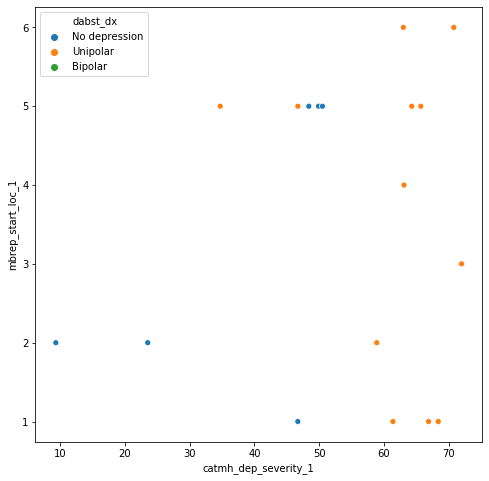

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(
    data=with_demog.reindex(),
    x='catmh_dep_severity_1',
    y='mbrep_start_loc_1',
    hue='dabst_dx',
    ax=ax
)